In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

## Sistemas Discretos: 
#### (1) Clasificación:
#### - con y sin memoria
#### - invariantes o variantes en el tiempo
#### - líneales o no líneales
#### - causales o no causales
#### - estables o inestables
#### - recursivos o no recursivos

#### (2) Caracterización

#### - En el dominio del tiempo
#### - En el dominio de la frecuencia

- - -

#### Caracterización en el dominio del tiempo 

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-15 a la(s) 16.01.41.png">


#### N = 0 -> el sistema se llama NO RECURSIVO y la salida actual no depende de salidas anteriores:

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-15 a la(s) 16.05.32.png">

### Estos sistemas se llaman FIR (Respuesta al Impulso Finita).

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-15 a la(s) 16.08.34.png">

- - -

## Ejemplo 1: Encontrar la respuesta del sistema dado por la ecuación:

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-15 a la(s) 16.05.32.png">

## Considernado M = 15 , a0 = br = 1 para r = 0,...,15 cuando la entrada es una rampa.

## (Sistema no recursivo)

In [2]:
nr = np.arange (-10,10)
rampa = np.piecewise (nr, [nr>=0],[lambda nr: nr , lambda nr: 0])

M = 16 #de 0 a 15
nh = np.arange (M)
h = np.ones (M)

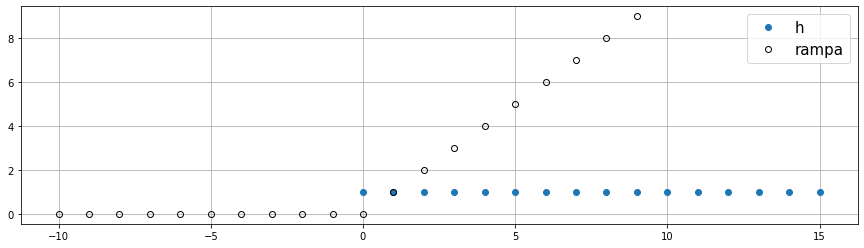

In [4]:
plt.figure (figsize=(15,4))
plt.plot (nh,h,"o",label=("h"))
plt.plot (nr,rampa,"ko",label=("rampa"),mfc = "None")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

In [5]:
y = np.convolve (h,rampa)
n0 = nh [0] + nr [0]
Ny = len (nh) + len (nr) - 1
ny = np.arange (n0,n0+Ny)

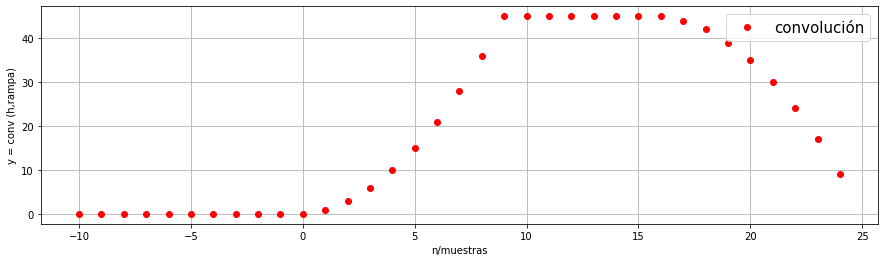

In [7]:
plt.figure (figsize=(15,4))
plt.plot (ny,y,"ro",label=("convolución"))
plt.ylabel ("y = conv (h,rampa)")
plt.xlabel ("n/muestras")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

In [9]:
from FRespuestastyfdefiltrosFIReIIR import FIRrespt, FIRrespf, IIRrespt, IIRrespf

In [10]:
y1 = FIRrespt (nr,rampa,nh,h)

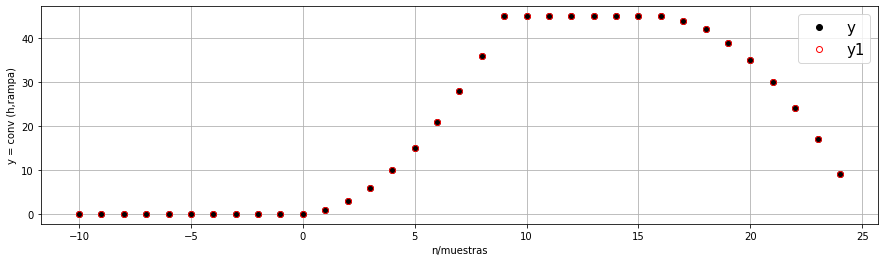

In [11]:
plt.figure (figsize=(15,4))
plt.plot (ny,y,"ko",label=("y"))
plt.plot (y1[:,0],y1[:,1],"ro",mfc="None",label="y1")
plt.ylabel ("y = conv (h,rampa)")
plt.xlabel ("n/muestras")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

La respuesta que calculamos usando convolución y la función de la cátedra coinciden.

- - -

## (Sistemas Recursivos)

## Ejemplo 2: Determina la respuesta del sistema recursivo y(n) = 0.5 y(n-1) + x(n) al impulso unitario con la condición inicial de reposo.

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-15 a la(s) 16.15.54.png">

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-15 a la(s) 16.18.01.png">

## y(n) - 0.5 y(n-1) = x(n)

In [12]:
#ENTRADA
n = np.arange (20)
Delta = np.piecewise (n,[n==0],[lambda n: 1, lambda n: 0])

y2 = lambda n: np.power (1/2,n)

#COEFICIENTES
c = np.array ([1,0])

#VECTOR DE LAS ENTRADAS
d = np.array ([1, -0.5])


y3 = IIRrespt (Delta,c,d)

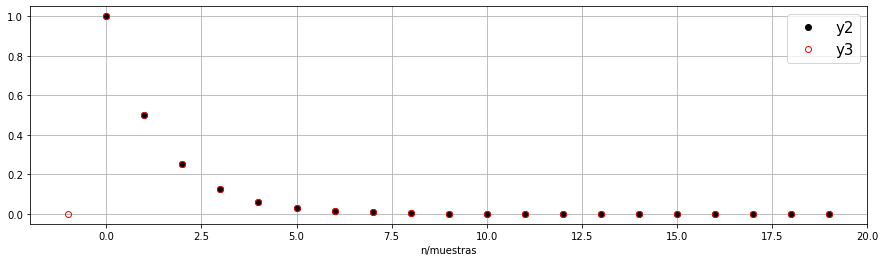

In [14]:
plt.figure (figsize=(15,4))
plt.plot (n,y2(n),"ko",label=("y2"))
plt.plot (y3[:,0],y3[:,1],"ro",mfc="None",label="y3")
plt.xlabel ("n/muestras")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

- - -

## Caracterización en el dominio de la frecuencia:

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-15 a la(s) 16.24.02.png">

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-15 a la(s) 16.24.51.png">

## Ejemplo 3: ¿Cuál será la respuesta en frecuencia del sistema del Ejemplo 1?

In [17]:
M = 16 #de 0 a 15
nh = np.arange (M)
h = np.ones (M)

w = np.arange (-np.pi,np.pi,0.001)
H = sum (np.exp(-1j*w*k)*1 for k in np.arange (0,M,1))

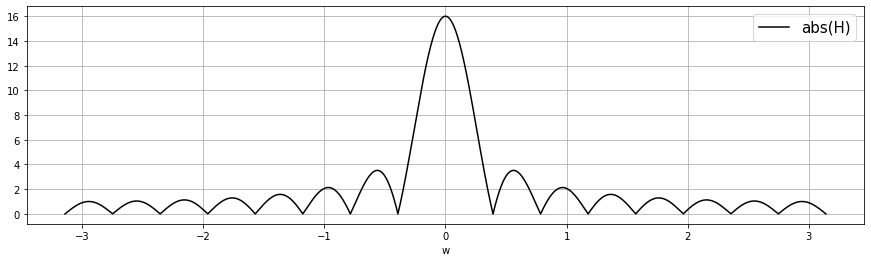

In [20]:
plt.figure (figsize=(15,4))
plt.plot (w,abs(H),"k",label="abs(H)")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

Respuesta en frecuencia del módulo.

In [23]:
H1 = FIRrespf (w,h)
H1.shape

(6284, 3)

Tiene 3 columnas porque una es módulo y fase y la columna 0 es frecuencia.

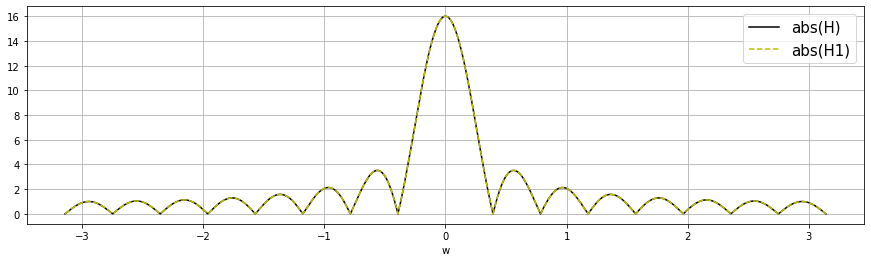

In [27]:
plt.figure (figsize=(15,4))
plt.plot (w,abs(H),"k",label="abs(H)")
plt.plot (H1[:,0],H1[:,1],label="abs(H1)",linestyle="--",color="y")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

### Ahora la Fase:


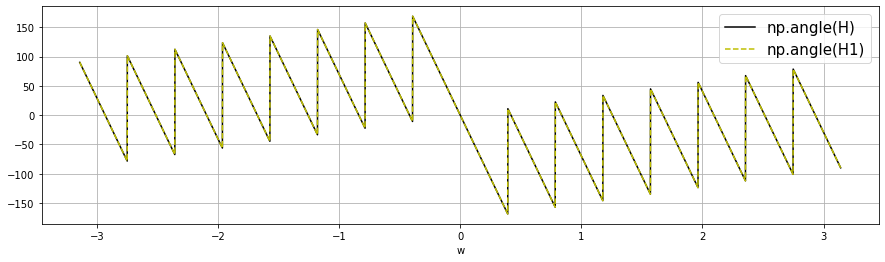

In [31]:
plt.figure (figsize=(15,4))
plt.plot (w,np.angle(H,deg="True"),"k",label="np.angle(H)")
plt.plot (H1[:,0],H1[:,2]*180/np.pi,label="np.angle(H1)",linestyle="--",color="y")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

- - -

## Ejemplo 4: ¿Cuál será la respuesta en frecuencia del sistema del Ejemplo 2?

#### y(n) - 0.5 y(n-1) = x(n)

In [32]:
#COEFICIENTES
c = np.array ([1,0])

#VECTOR DE LAS ENTRADAS
d = np.array ([1, -0.5])

w = np.arange (-np.pi,np.pi,0.001)

H_IIR = IIRrespf (w,c,d)

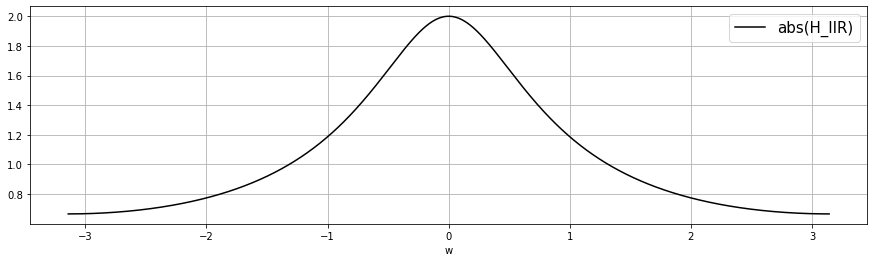

In [34]:
plt.figure (figsize=(15,4))
plt.plot (H_IIR[:,0],H_IIR[:,1],label="abs(H_IIR)",color="k")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

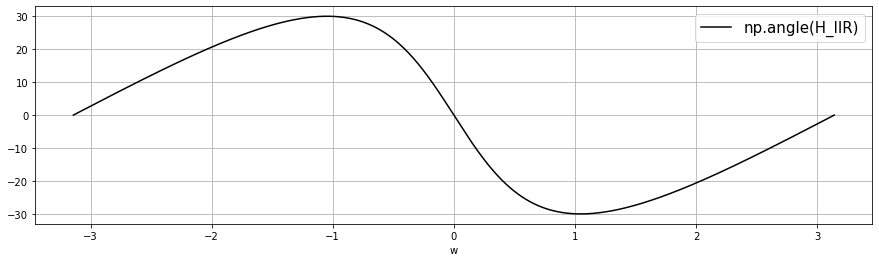

In [36]:
plt.figure (figsize=(15,4))
plt.plot (H_IIR[:,0],H_IIR[:,2]*180/np.pi,label="np.angle(H_IIR)",color="k")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 08.20.07.png">

# EJERCICIO 1
# yn = (1/7) * ( x(n) + x(n-1) + ... + x(n-6) )

In [43]:
N = 7
n = np.arange (N)
h = np.ones (N)/7

nr = np.arange (-10,10)
rampa = np.piecewise (nr, [nr>=0],[lambda nr: nr , lambda nr: 0])

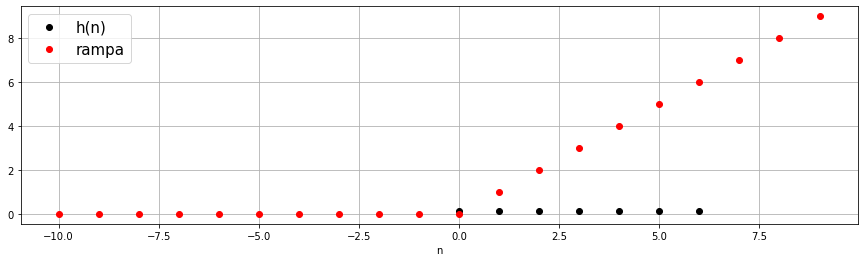

In [45]:
plt.figure (figsize=(15,4))
plt.plot (n,h,"ko",label="h(n)")
plt.plot (nr,rampa,"ro",label="rampa")
plt.xlabel ("n")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

In [46]:
y7 = FIRrespt (nr,rampa,n,h)

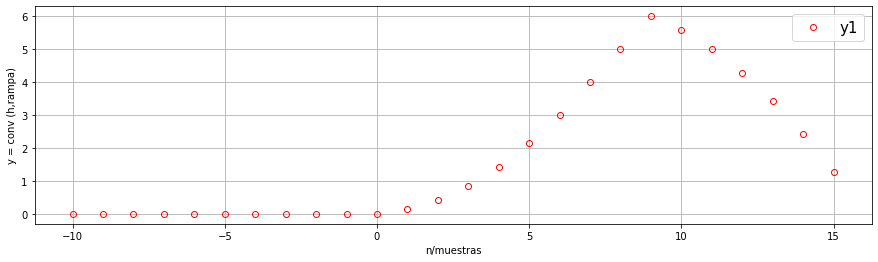

In [47]:
plt.figure (figsize=(15,4))
plt.plot (y7[:,0],y7[:,1],"ro",mfc="None",label="y1")
plt.ylabel ("y = conv (h,rampa)")
plt.xlabel ("n/muestras")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

# EJERCICIO 2

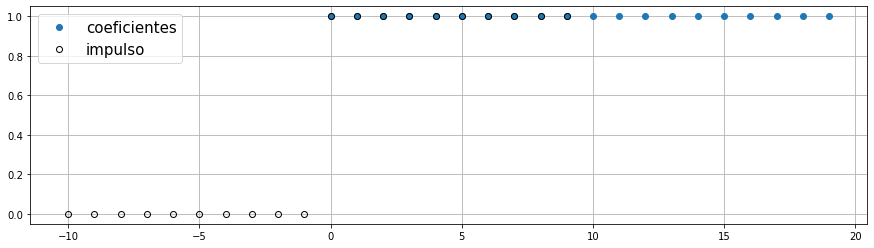

In [51]:
nb = np.arange(-10,10)
Unistepb = np.piecewise (nb,[nb>=0], [lambda nb:1, lambda nb:0])

nh = np.arange(len(nb))
h = np.ones(len(nb)) #Vector de unos, son los coeficientes cr=br/a0


plt.figure(figsize=(15,4))
plt.plot(nh,h,"o",label=("coeficientes"))  #Gráfica del vector de los coeficientes
plt.plot(nb,Unistepb,"ko",label=("impulso"),mfc="None")  #mdf=none= PUNTITOS VACÍOS
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

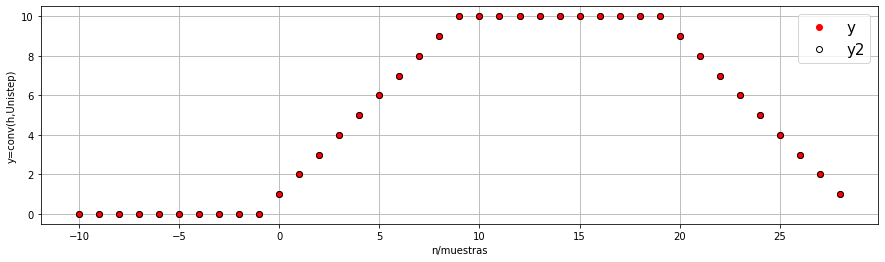

In [52]:
y2=np.convolve(h,Unistepb)
n02=nh[0]+nb[0]  #donde empieza la convolución
Ny2=len(nh) + len(nb) -1     #cuántos puntos tendrá 
ny2=np.arange(n02,n02+Ny2)

#VERIFICO CON EL CODIGO
y2f=FIRrespt(nb,Unistepb,nh,h)  #4vectores


plt.figure(figsize=(15,4))
plt.plot(ny2,y2,"ro",label="y")
plt.plot(y2f[:,0],y2f[:,1],"ko",mfc="None",label="y2")
plt.xlabel("n/muestras")
plt.ylabel("y=conv(h,Unistep)")
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

# EJERCICIO 3

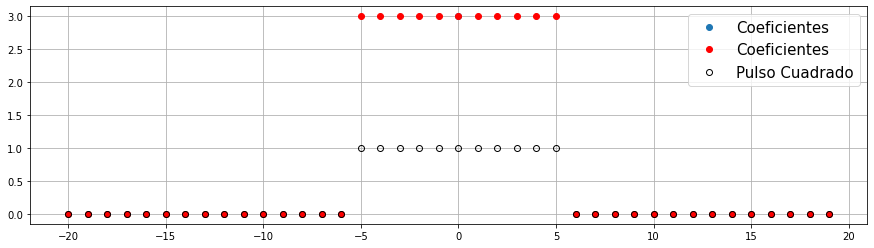

In [64]:
n3 = np.arange(-20,20)
a = 5 #T
PulsoCuadrado = np.piecewise (n3,[(n3>=-a)&(n3<=a)], [lambda n3:1, lambda n3:0])

nh3 = np.arange(1)
R = 3
h=np.ones(1)*R
Y = R*PulsoCuadrado

plt.figure(figsize=(15,4))
plt.plot(nh3,R,"o",label=("Coeficientes"))  #Gráfica del vector de los coeficientes
plt.plot(n3,Y,"ro",label=("Coeficientes"))  #Gráfica del vector de los coeficientes
plt.plot(n3,PulsoCuadrado,"ko",label=("Pulso Cuadrado"),mfc="None")  #mdf=none= PUNTITOS VACÍOS
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

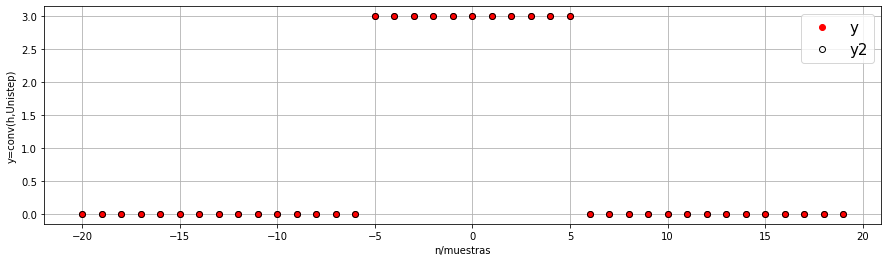

In [65]:
Y3 = np.convolve (h,PulsoCuadrado)
n03 = nh3[0]+ n3[0]  #donde empieza la convolución
Ny3 = len(nh3) + len(n3) -1     #cuántos puntos tendrá 
ny3 = np.arange(n03,n03+Ny3)

#VERIFICO CON EL CODIGO
y3f = FIRrespt(n3,PulsoCuadrado,nh3,h)  #4vectores


plt.figure(figsize=(15,4))
plt.plot(ny3,Y3,"ro",label="y")
plt.plot(y3f[:,0],y3f[:,1],"ko",mfc="None",label="y2")
plt.xlabel("n/muestras")
plt.ylabel("y=conv(h,Unistep)")
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

# EJERCICIO 4

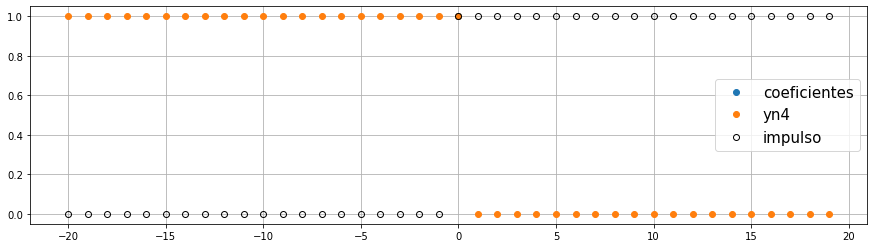

In [74]:
n4 = np.arange(-20,20)
Unistepb4 = lambda n4: np.piecewise (n4,[n4>=0], [lambda n4:1, lambda n4:0]) #xn

nh4 = np.arange(1)
h4 = np.ones(1)

yn4 = h4*Unistepb4 (-n4)

plt.figure(figsize=(15,4))
plt.plot(nh4,h4,"o",label=("coeficientes"))  #Gráfica del vector de los coeficientes
plt.plot(n4,yn4,"o",label=("yn4")) 
plt.plot(n4,Unistepb4(n4),"ko",label=("impulso"),mfc="None")  #mdf=none= PUNTITOS VACÍOS
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

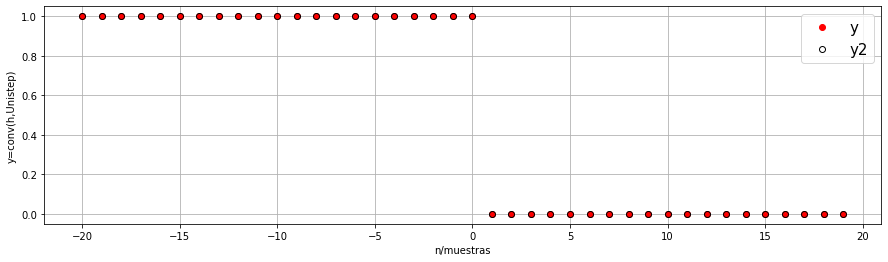

In [76]:
Y4 = np.convolve (h4,Unistepb4(-n4))
n04 = nh4[0]+ n4[0]  #donde empieza la convolución
Ny4 = len(nh4) + len(n4) -1     #cuántos puntos tendrá 
ny4 = np.arange(n04,n04+Ny4)

#VERIFICO CON EL CODIGO
y4f = FIRrespt(n4,Unistepb4(-n4),nh4,h4)  #4vectores


plt.figure(figsize=(15,4))
plt.plot(ny4,Y4,"ro",label="y")
plt.plot(y4f[:,0],y4f[:,1],"ko",mfc="None",label="y2")
plt.xlabel("n/muestras")
plt.ylabel("y=conv(h,Unistep)")
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

- - -

# Encontrar la respuesta al impulso unitario del sistema: y(n) = 5 x(n) + n*x(n-2) 

#### x(n) = delta (n)

#### n = 0: y(0) = (5 * 1) + (0 * 0) = 5
#### n = 1: y(1) = (5 * 0) + (1 * 0) = 0
#### n = 2: y(2) = (5 * 0) + (2 * 1) = 2
#### ... el resto de las respuestas es 0.

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 09.19.34.png">

- - -
# 1. y(n) = x (-n) ok

    Suponemos dos entradas: x1(n) y x2(n)

    La respuesta a x1: y1(n) = x1 (-n)

    La respuesta a x2: y2(n) = x2 (-n)

    T [a.x1(n) + b.x2(n)] = a.T[x1(n)] + b.T[x2(n)] = a.(x1(-n)) + b.(x2(-n)) 

    a.y1(n) + b.y2(n) = a.(x1(-n)) + b.(x2(-n)) 

    Por lo tanto es líneal.



    Analizamos Invarianza en el tiempo:

    T [x1(n-n0)] = x1 (-(n-n0)) = x1 (-n+n0) 

    y1 (n - n0) = x1 (-n-n0) 

    Por lo tanto, NO es invariante en el tiempo.



    Analizamos Causalidad:

    n = -1 -> y(-1) = x(1) 
    n = 1 -> y(1) = x(-1) 

    Entonces es un sistema NO causal.
- - -

# 2. y(n) = n.x(n) ok

    Suponemos dos entradas: x1(n) y x2(n)

    La respuesta a x1: y1(n) = n.x1(n)

    La respuesta a x2: y2(n) = n.x2(n)

    T [a.x1(n) + b.x2(n)] = a.T[x1(n)] + b.T[x2(n)] = a.(n.x1(n)) + b.(n.x2(n)) 

    a.y1(n) + b.y2(n) = a.(n.x1(n)) + b.(n.x2(n))

    Por lo tanto es líneal.



    Analizamos Invarianza en el tiempo:

    T [x1(n-n0)] = n.x1 (n-n0) 

    y1 (n - n0) = (n-n0).x1 (n-n0) = n.x1(n-n0) - n0.x1(n-n0)

    Por lo tanto, es NO invariante en el tiempo.



    Analizamos Causalidad:

    n = -1 -> y(-1) = (-1).x(-1) = -x(-1)
    
    n = 1 -> y(1) = 1.x(1) = x(1)

    Entonces es un sistema causal.

- - -

# 3. y(n) = x(n-2) - 2.x(n-8) ok

    Suponemos dos entradas: x1(n) y x2(n)

    La respuesta a x1: y1(n) = x1(n-2) - 2.x1(n-8)

    La respuesta a x2: y2(n) = x2(n-2) - 2.x2(n-8)

    T [a.x1(n) + b.x2(n)] = a.T[x1(n)] + b.T[x2(n)] = a.[x1(n-2) - 2.x1(n-8)] + b.[x2(n-2) - 2.x2(n-8)] = a.y1(n) + b.y2(n)

    Por lo tanto es líneal.



    Analizamos Invarianza en el tiempo:

    T [x1(n-n0)] = x1(n-n0-2) - 2.x1(n-n0-8)

    y1 (n - n0) = x1((n-n0)-2) - 2.x1((n-n0)-8) = x1(n-n0-2) - 2.x1(n-n0-8) 
    x1(n-n0-2) - 2.x1(n-n0-8)

    Por lo tanto, es invariante en el tiempo.



    Analizamos Causalidad:

    n = -1 -> y(-1) = x(-1-2) - 2.x(-1-8) = x(-3) - 2.x(-9) 
    
    n = 10 -> y(10) = x(10-2) - 2.x(10-8) = x(8) - 2.x(2) 

    Entonces es un sistema causal.
- - -

# 4. y(n) = x (4n + 1) ok

    Suponemos dos entradas: x1(n) y x2(n)

    La respuesta a x1: y1(n) = x1 (4n + 1)

    La respuesta a x2: y2(n) = x2 (4n + 1)

    T [a.x1(n) + b.x2(n)] = a.T[x1(n)] + b.T[x2(n)] = a.(x1 (4n + 1)) + b.(x2 (4n + 1)) = a.y1(n) + b.y2(n)

    Por lo tanto es líneal.



    Analizamos Invarianza en el tiempo:

    T [x1(n-n0)] = x1 ((4n + 1) - n0)

    y1 (n - n0) = x1 (4(n-n0) + 1) 

    Por lo tanto, NO es invariante en el tiempo.



    Analizamos Causalidad:

    n = -1 -> y(-1) = x(-3) 
    
    n = 1 -> y(1) = x(5) 

    Entonces es un sistema causal.
- - -

# 5. 
# y(n) = x(n+1) si n<-1
# y(n) = 0 si n=-1
# y(n) = x(n) si n>-1


    Suponemos dos entradas: x1(n) y x2(n)

    La respuesta a x1: 
    y1(n) = x1(n+1) si n<-1
    y1(n) = 0 si n=-1  
    y1(n) = x1(n) si n>-1

    La respuesta a x2:  
    y2(n) = x2(n+1) si n<-1
    y2(n) = 0 si n=-1  
    y2(n) = x2(n) si n>-1

    T [a.x1(n) + b.x2(n)] = a.T[x1(n)] + b.T[x2(n)] 
        a.x1(n+1)+b.x2(n+1)     si n<-1
        a.0+b.0 = 0     si n=-1  
        a.x1(n)+b.x2(n)   si n>-1

    Por lo tanto es líneal.



    Analizamos Invarianza en el tiempo:

    T [x1(n-n0)] 
        x1(n-n0+1)  si n<-1
        0   si n-n0=-1  
        x1(n-n0)    si n>-1

    y1 (n - n0)
        x1(n-n0+1)      si n-n0<-1
        0   si n-n0=-1  
        x1(n-n0)   si n-n0>-1

    Por lo tanto, es invariante en el tiempo.



    Analizamos Causalidad:

    y(n) = x(n+1) si n<-1
    y(n) = 0 si n=-1
    y(n) = x(n) si n>-1

    Para n<-1: y(n) = x(n+1)
        Si adopto n=-3 ==> y(-3)=x(-x+1)
                           y(-3)=x(-2)

    El sistema es NO causal.
- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-19 a la(s) 18.07.52.png">

In [48]:
#ENTRADA
n = np.arange (20)
xn = np.piecewise (n,[(n>=0)&(n<10)],[lambda n: 1, lambda n: 0])

#COEFICIENTES DE LAS ENTRADAS (X)
c = np.array ([1,0])

#VECTOR DE LAS ENTRADAS (Y)
d = np.array ([1, -0.5])


y3 = IIRrespt (xn,c,d)

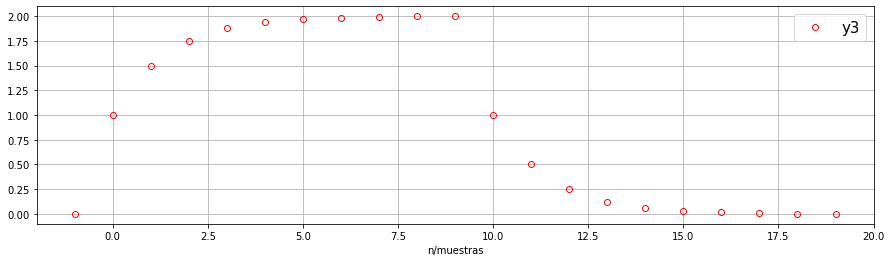

In [49]:
plt.figure (figsize=(15,4))
plt.plot (y3[:,0],y3[:,1],"ro",mfc="None",label="y3")
plt.xlabel ("n/muestras")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 10.43.27.png">

# PUNTO 1

1) Escribir todas las salidas de un lado y las entradas del otro:

y(n) - 0.7 y(n-1) = x(n)

2) Crear un vector de coeficientes de las salidas y uno de las entradas.

CONDICIÓN INCIAL: y(-1) = 0

n = 0 -> y(0) - 0.7 y(-1) = x(0) -> y(0) = 1

n = 1 -> y(1) - 0.7 y (0) = x(1) -> y(1) = 0.7

n = 2 -> y(2) - 0.7 (1) = x(2) -> y(2) = (0.7)**2

n = 3 -> y(3) - 0.7 (2) = x(3) -> y(3) = (0.7)**3

...

y(n) = (0.7)**n

In [88]:
#ENTRADA
n8 = np.arange (0,10)
Delta8 = np.piecewise (n8,[n8==0],[lambda n8: 1, lambda n8: 0])

#COEFICIENTES DE ENTRADA
c8 = np.array ([1,0])

#VECTOR DE LAS SALIDAS
d8 = np.array ([1, -0.7])


y_8 = lambda n8: np.power (0.7,n8)


y8 = IIRrespt (Delta8,c8,d8)

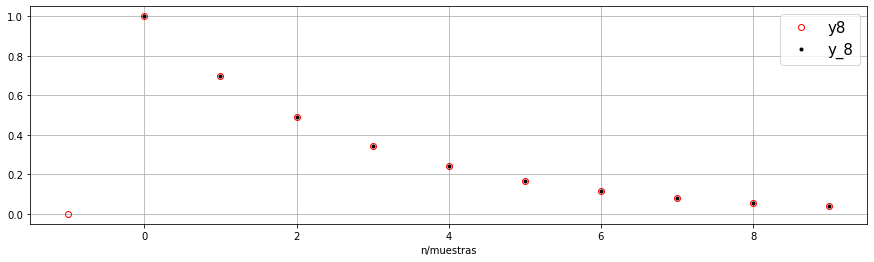

In [90]:
plt.figure (figsize=(15,4))
plt.plot (y8[:,0],y8[:,1],"ro",mfc="None",label="y8")
plt.plot (n8,y_8(n8),"ko",label=("y_8"),ms=3)
plt.xlabel ("n/muestras")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

# PUNTO 2

1) Escribir todas las salidas de un lado y las entradas del otro:

y(n) -3 y(n-1) + 2 y(n-2) = x(n) si se parte del reposo

2) Crear un vector de coeficientes de las salidas y uno de las entradas.

CONDICIÓN INCIAL: y(-1)=0 , y(-2)=0 , ... , y(-n)=0 

n = 0 -> y(0) -3 y(-1) + 2 y(-2) = x(0) -> y(0) = 1

n = 1 -> y(1) -3 y(0) + 2 y(-1) = x(1) -> y(1) = 3

n = 2 -> y(2) -3 y(1) + 2 y(0) = x(2) -> y(2) = 9-2 = 7

n = 3 -> y(3) -3 y(2) + 2 y(1) = x(3) -> y(3) = 21-6 = 15

n = 4 -> y(4) -3 y(3) + 2 y(2) = x(4) -> y(4) = 45-14 = 31

...

y(n) = [2* y (n-1)]+1

In [103]:
n12=np.arange(0,16)

X2=np.piecewise(n12, [n12==0], [lambda n12:1, lambda n12:0])
e=np.array([1,0,0])    #vector de coef de entrada
f=np.array([1,-3,2]) #vector de coef de salidas

Y2=IIRrespt(X2,e,f)


rta2=[1]
anterior=1

for i in range(0,15):
    anterior=anterior + 2 * (2**i)
    rta2.append(anterior)

In [ ]:
# OTRA FORMA

n12=np.arange(0,16)

X2=np.piecewise(n12, [n12==0], [lambda n12:1, lambda n12:0])
e=np.array([1,0,0])    #vector de coef de entrada
f=np.array([1,-3,2]) #vector de coef de salidas

Y2=IIRrespt(X2,e,f)

rta2=[]
anterior=0

for i in range(len(n12)):
    anterior=anterior + 2**i
    rta2.append(anterior)

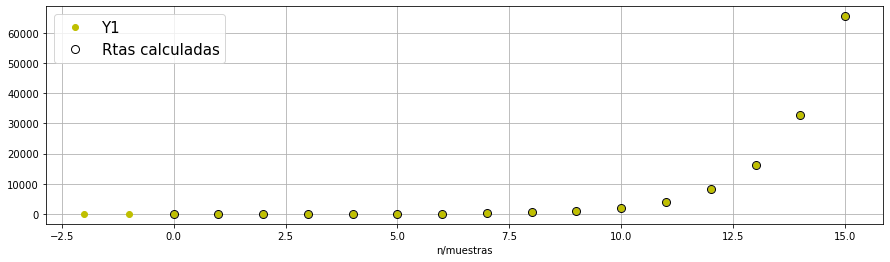

In [104]:
plt.figure(figsize=(15,4))
plt.plot(Y2[:,0],Y2[:,1],"yo",label="Y1")
plt.plot(n12,rta2,"ko",mfc="None",ms=8,label="Rtas calculadas") #PONGO Y(N) CUANDO DEFINI Y CON LAMBDA N:....
plt.xlabel("n/muestras")
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-19 a la(s) 19.23.08.png">


# PUNTO 1

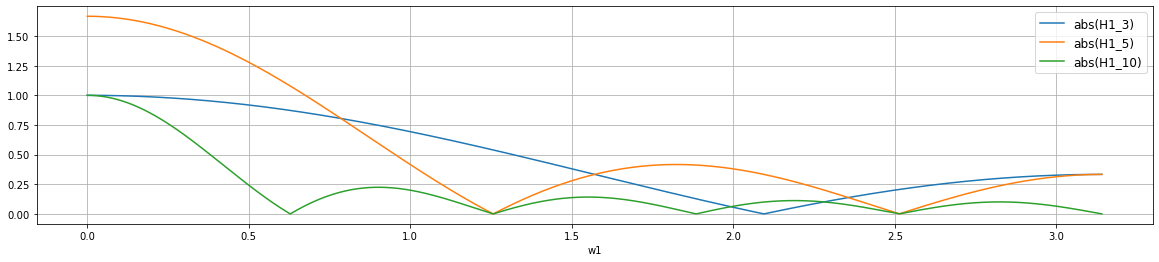

In [105]:
w1 = np.arange (0,np.pi,0.001)
#Filtro de Orden 3
H1_3 = (1/3) * (np.exp(-w1*0j) + np.exp(-w1*1j) + np.exp(-w1*2j))
#Filtro de Orden 5
H1_5 = (1/3) * (np.exp(-w1*0j) + np.exp(-w1*1j) + np.exp(-w1*2j) + np.exp(-w1*3j) + np.exp(-w1*4j))
#Filtro de Orden 10
M10 = 10 
aux10 = []
for k in range (M10):
    aux10.append ( (1/M10) * np.exp(-w1*1j*k) )
H1_10 = np.sum (aux10,0)


plt.figure (figsize=(20,4))
plt.plot (w1,abs (H1_3),label="abs(H1_3)")
plt.plot (w1,abs (H1_5),label="abs(H1_5)")
plt.plot (w1,abs (H1_10),label="abs(H1_10)")
plt.xlabel ("w1")
plt.legend (fontsize = 12)
plt.grid (True)
plt.show ()

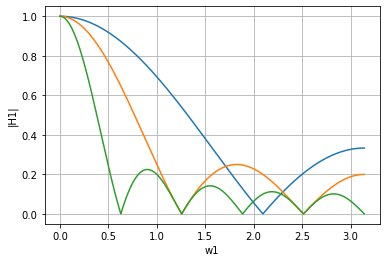

In [119]:
orden = np.array ([3,5,10])
H1 = [] #Ganancia del filtro

for index,M in enumerate (orden):
    aux1 = []
    for k in range (M):
        aux1.append ( (1/M) * np.exp(-w1*1j*k) )
    H1.append( np.sum (aux1,0) )
    plt.plot (w1,abs(H1[index]))

plt.xlabel ("w1")
plt.ylabel ("|H1|")
plt.grid (True)
plt.show ()

# PUNTO 2 "A"

In [163]:
n02 = np.arange (0,5)
w02 = np.arange (0,np.pi,0.001)
c = np.zeros(len(n02))
c[0] = -0.06
c[2] = 0.88
c[4] = -0.06

H = sum (np.exp(-1j*w02*k)*c[k] for k in np.arange (len(n02)))
y=FIRrespf(w02,c)

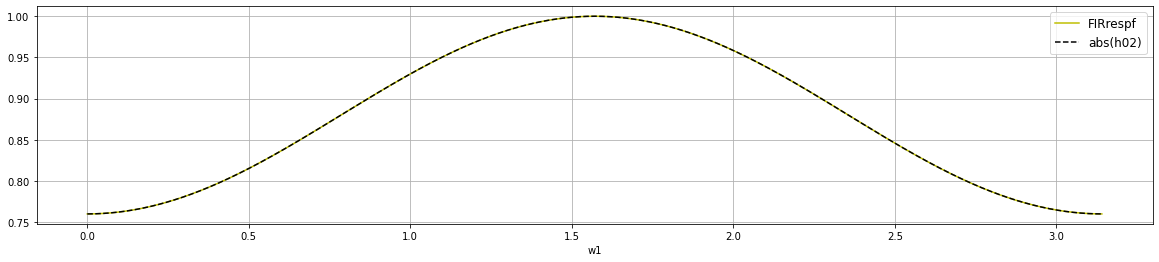

In [164]:
plt.figure (figsize=(20,4))
plt.plot (y[:,0],y[:,1],"y",label="FIRrespf")
plt.plot(w02,abs(H),"--",color="k",label="abs(h02)")
plt.xlabel ("w1")
plt.legend (fontsize = 12)
plt.grid (True)
plt.show ()

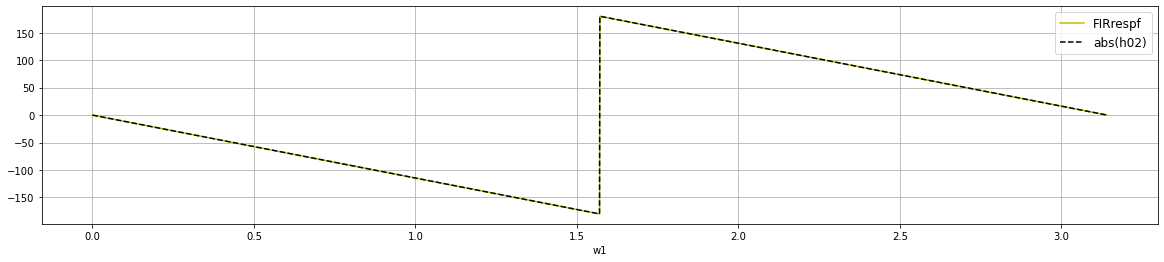

In [175]:
plt.figure (figsize=(20,4))
plt.plot (y[:,0],y[:,2]*180/np.pi,"y",label="FIRrespf")
plt.plot(w02,np.angle(H)*180/np.pi,"--",color="k",label="abs(h02)")
plt.xlabel ("w1")
plt.legend (fontsize = 12)
plt.grid (True)
plt.show ()

# PUNTO 2 "B"

In [188]:
M = 2
N = 0
n03 = np.arange (0,M+1,dtype=float)
w03 = np.arange (0,np.pi,0.001)
c03 = np.piecewise (n03, [(n03>=0)], [lambda n03: 1/(M+N+1), lambda n03: 0])

H03 = sum (np.exp(-1j*w03*k)*c03[k] for k in np.arange (len(n03)))
y03 = FIRrespf(w03,c03)

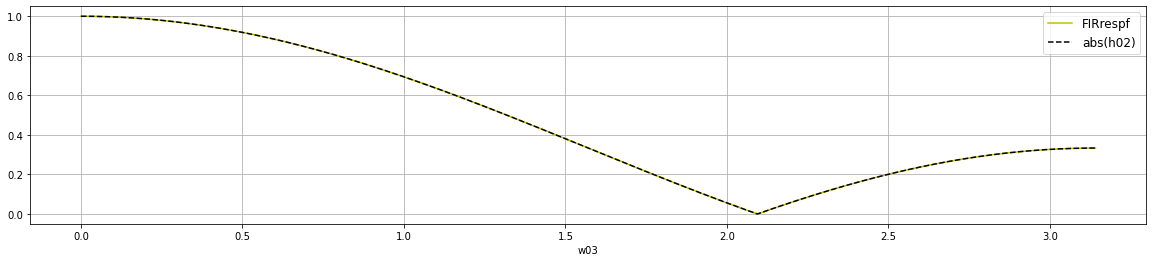

In [189]:
plt.figure (figsize=(20,4))
plt.plot (y03[:,0],y03[:,1],"y",label="FIRrespf")
plt.plot(w03,abs(H03),"--",color="k",label="abs(h02)")
plt.xlabel ("w03")
plt.legend (fontsize = 12)
plt.grid (True)
plt.show ()

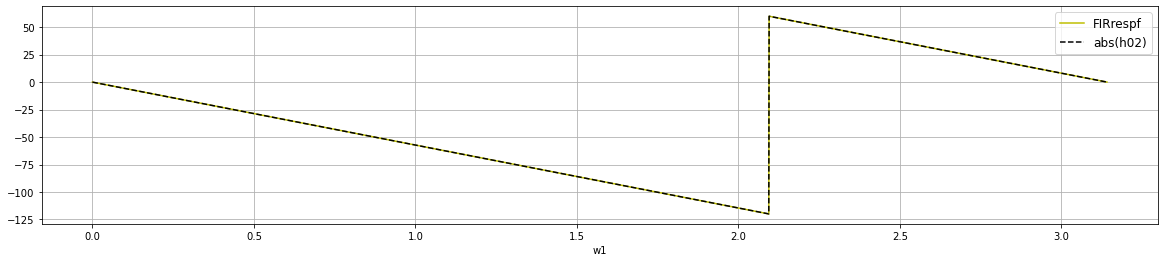

In [190]:
plt.figure (figsize=(20,4))
plt.plot (y03[:,0],y03[:,2]*180/np.pi,"y",label="FIRrespf")
plt.plot(w03,np.angle(H03)*180/np.pi,"--",color="k",label="abs(h02)")
plt.xlabel ("w1")
plt.legend (fontsize = 12)
plt.grid (True)
plt.show ()

# PUNTO 3

# y(n) = a.y(n-1) + x(n)
# y(n) - a.y(n-1) = x(n)

In [191]:
#COEFICIENTES X
c33 = np.array ([1,0])

#VECTOR DE Y
a33 = 2
d33 = np.array ([1, -a])

w33 = np.arange (-np.pi,np.pi,0.001)

H_IIR33 = IIRrespf (w33,c33,d33)

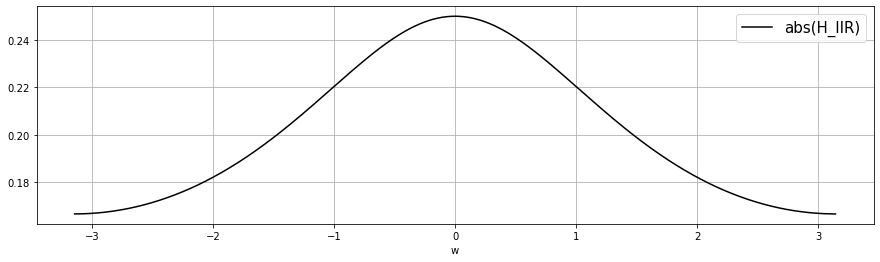

In [192]:
plt.figure (figsize=(15,4))
plt.plot (H_IIR33[:,0],H_IIR33[:,1],label="abs(H_IIR)",color="k")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

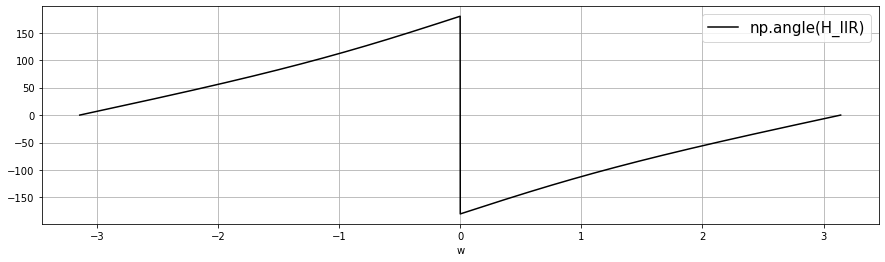

In [193]:
plt.figure (figsize=(15,4))
plt.plot (H_IIR33[:,0],H_IIR33[:,2]*180/np.pi,label="np.angle(H_IIR)",color="k")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

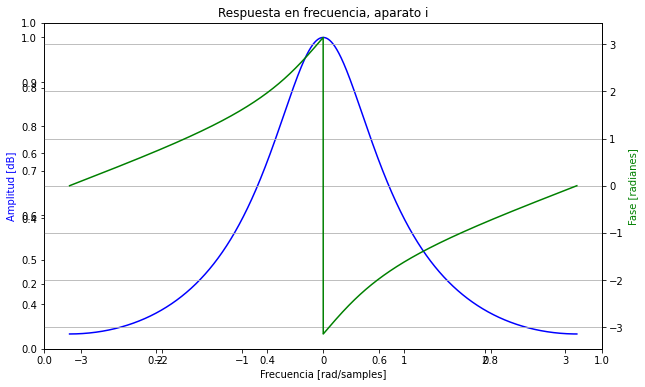

In [195]:
#OTRA FORMA
import scipy.signal as ss

a4 = 2

A4 = np.array ( [1, -a4] )
B4 = np.array ( [1,0] )

w4 = np.arange (-np.pi,np.pi,0.001)

w_4 , H_4 = ss.freqz (B4,A4,w4,plot=None)

mod_H4 = np.abs (H_4)
pha_H4 = np.angle (H_4)


fig = plt.figure (figsize = (10,6))
plt.title ("Respuesta en frecuencia, aparato i")
ax1 = fig.add_subplot (111)

plt.plot (w_4,mod_H4,"b")
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (w_4,pha_H4,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

In [196]:
H_IIR_33 = IIRrespt (Unistepb,c33,d33)

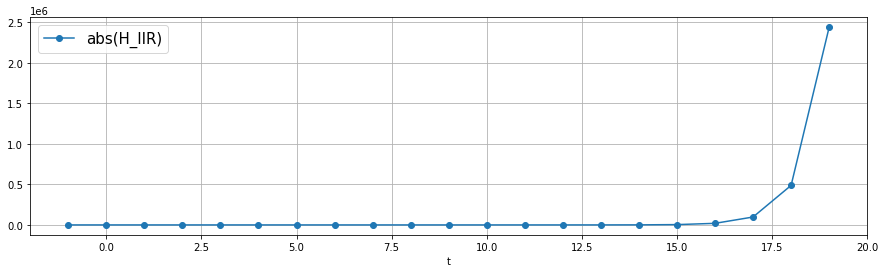

In [199]:
plt.figure (figsize=(15,4))
plt.plot (H_IIR_33[:,0],H_IIR_33[:,1],"o-",label="abs(H_IIR)")
plt.xlabel ("t")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

Aquí se puede observar la inestabilidad, por lo que debemos elegir un valor de a menor a 1.

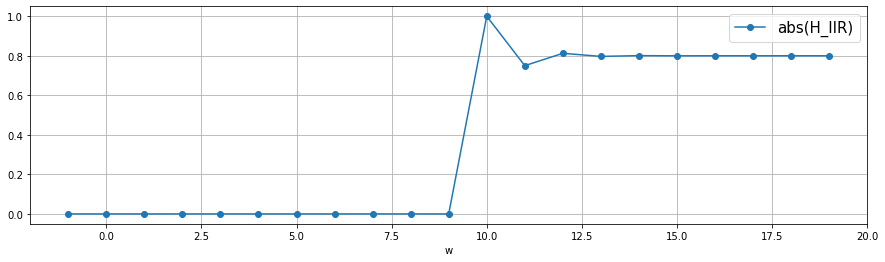

In [202]:
#COEFICIENTES X
c33 = np.array ([1,0])

#VECTOR DE Y
a3_3 = 0.25
d33 = np.array ([1, a3_3])

w33 = np.arange (-np.pi,np.pi,0.001)

H_IIR33b = IIRrespt (Unistepb,c33,d33)

plt.figure (figsize=(15,4))
plt.plot (H_IIR33b[:,0],H_IIR33b[:,1],"o-",label="abs(H_IIR)")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

Se produce mayor estabilidad.

- - -